<a href="https://colab.research.google.com/github/hoang6k/mang_noron_IT4805/blob/master/B%C3%A0i_t%E1%BA%ADp_l%E1%BA%A7n_1_%C4%90%C3%A0o_Minh_Ho%C3%A0ng_20151505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

**AND**

In [0]:
np.random.seed(0)

X = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float)
y = np.array([0, 0, 0, 1], dtype=np.float)
bias = np.asarray([1, 1, 1, 1], dtype=np.float)
X = np.concatenate((X, bias.reshape(4,1)), axis=1)
y = y.reshape((4,1))

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def loss(A, y, lam=0.001):
  return -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))

In [172]:
def logistic_regression(w_init, X, y, lr=0.1, epsilon=1e-4, nepoches=1000):
  w = w_init
  loss_hist = [loss(sigmoid(X.dot(w)), y)]
  epoch = 0
  while epoch < nepoches:
    epoch += 1
    if epoch % 100 == 0:
      lr /= 10
    Z = X.dot(w)
    A = sigmoid(Z)
    acc = np.mean((A > 0.5) == y)
    loss_hist.append(loss(A, y))
    if epoch > 1 and np.abs(loss_hist[-1] - loss_hist[-2]) < epsilon:
      break
    dZ = A - y
    dW = X.T.dot(dZ) / y.shape[0]
    w = w - lr * dW
    print('Epoch {}: Loss={:.6f}, Accuracy={}%'.format(epoch, loss_hist[-1], 100 * acc))
  return w, loss_hist


w = np.random.rand(3, 1)
lr = 0.025
nepoches = 1000
eps = 1e-3
w, _loss = logistic_regression(w, X, y, lr, eps, nepoches)

Epoch 1: Loss=1.041117, Accuracy=25.0%
Epoch 2: Loss=1.033221, Accuracy=25.0%
Epoch 3: Loss=1.025420, Accuracy=25.0%
Epoch 4: Loss=1.017712, Accuracy=25.0%
Epoch 5: Loss=1.010097, Accuracy=25.0%
Epoch 6: Loss=1.002576, Accuracy=25.0%
Epoch 7: Loss=0.995148, Accuracy=25.0%
Epoch 8: Loss=0.987812, Accuracy=25.0%
Epoch 9: Loss=0.980569, Accuracy=25.0%
Epoch 10: Loss=0.973417, Accuracy=25.0%
Epoch 11: Loss=0.966357, Accuracy=25.0%
Epoch 12: Loss=0.959387, Accuracy=25.0%
Epoch 13: Loss=0.952508, Accuracy=25.0%
Epoch 14: Loss=0.945719, Accuracy=25.0%
Epoch 15: Loss=0.939019, Accuracy=25.0%
Epoch 16: Loss=0.932408, Accuracy=25.0%
Epoch 17: Loss=0.925885, Accuracy=25.0%
Epoch 18: Loss=0.919450, Accuracy=25.0%
Epoch 19: Loss=0.913102, Accuracy=25.0%
Epoch 20: Loss=0.906841, Accuracy=25.0%
Epoch 21: Loss=0.900666, Accuracy=25.0%
Epoch 22: Loss=0.894576, Accuracy=25.0%
Epoch 23: Loss=0.888570, Accuracy=25.0%
Epoch 24: Loss=0.882649, Accuracy=25.0%
Epoch 25: Loss=0.876811, Accuracy=25.0%
Epoch 26:

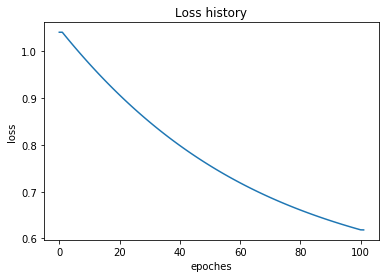

In [173]:
plt.plot([i for i in range(len(_loss))], _loss, linestyle='-')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Loss history')
plt.show()

**CIFAR**

In [0]:
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# chose id and transform y
label_id = 9
train_id = np.where(y_train == label_id)[0]
test_id = np.where(y_test == label_id)[0]
y_train = np.zeros((y_train.shape[0], 1))
y_train[train_id] = 1
y_test = np.zeros((y_test.shape[0], 1))
y_test[test_id] = 1

# transform x
mean_images = np.mean(x_train, axis=0)
x_train = np.subtract(x_train, mean_images, dtype=np.float)
x_test = np.subtract(x_test, mean_images, dtype=np.float)
x_train = x_train.flatten().reshape((y_train.shape[0], -1)) / 255.0
x_test = x_test.flatten().reshape((y_test.shape[0], -1)) / 255.0
x_train = np.concatenate((x_train, np.ones(y_train.shape)), axis=1)
x_test = np.concatenate((x_test, np.ones(y_test.shape)), axis=1)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [176]:
w = np.random.rand(x_train.shape[1], 1) * 1e-2
lr = 0.1
eps = 1e-5
nepoches = 1000
w, _loss = logistic_regression(w, x_train, y_train, lr, eps, nepoches)

Epoch 1: Loss=1.022525, Accuracy=52.978%
Epoch 2: Loss=0.710437, Accuracy=54.337999999999994%
Epoch 3: Loss=0.657387, Accuracy=69.536%
Epoch 4: Loss=0.633896, Accuracy=72.416%
Epoch 5: Loss=0.616835, Accuracy=75.384%
Epoch 6: Loss=0.602102, Accuracy=76.668%
Epoch 7: Loss=0.588615, Accuracy=78.28%
Epoch 8: Loss=0.576008, Accuracy=79.708%
Epoch 9: Loss=0.564119, Accuracy=80.996%
Epoch 10: Loss=0.552859, Accuracy=82.254%
Epoch 11: Loss=0.542167, Accuracy=83.32000000000001%
Epoch 12: Loss=0.531997, Accuracy=84.294%
Epoch 13: Loss=0.522314, Accuracy=85.11%
Epoch 14: Loss=0.513085, Accuracy=85.79599999999999%
Epoch 15: Loss=0.504282, Accuracy=86.412%
Epoch 16: Loss=0.495880, Accuracy=86.924%
Epoch 17: Loss=0.487856, Accuracy=87.364%
Epoch 18: Loss=0.480188, Accuracy=87.802%
Epoch 19: Loss=0.472857, Accuracy=88.164%
Epoch 20: Loss=0.465845, Accuracy=88.474%
Epoch 21: Loss=0.459133, Accuracy=88.79%
Epoch 22: Loss=0.452707, Accuracy=88.988%
Epoch 23: Loss=0.446550, Accuracy=89.252%
Epoch 24: Lo

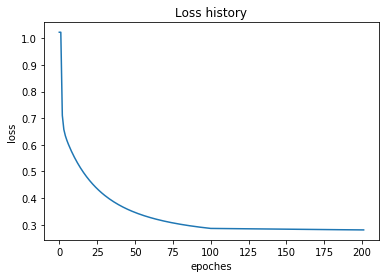

In [178]:
plt.plot([i for i in range(len(_loss))], _loss, linestyle='-')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Loss history')
plt.show()

In [179]:
ypred = x_test.dot(w) > 0
acc = np.mean(ypred == y_test)
print('Accuracy Test: %2.2f%%'%(acc*100))

Accuracy on test set: 90.23
Accuracy Test: 90.23%
